# Dataset Analysis

In [1]:
import pandas as pd
import os
from handwriting_recognition.utils import get_dataset_folder_path

path_to_data = get_dataset_folder_path()
path_to_tr = os.path.join(path_to_data, 'raw/train.csv')
path_to_ts = os.path.join(path_to_data, 'raw/test.csv')
path_to_val = os.path.join(path_to_data, 'raw/validation.csv')
print(path_to_tr)
print(path_to_ts)
print(path_to_val)

C:\Users\User\Desktop\handwriting-recognition\dataset\raw/train.csv
C:\Users\User\Desktop\handwriting-recognition\dataset\raw/test.csv
C:\Users\User\Desktop\handwriting-recognition\dataset\raw/validation.csv


c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\handwriting-recognition-mEqlV94N-py3.12\Lib\site-packages\pydantic\_internal\_fields.py:160: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
tr = pd.read_csv(path_to_tr)
ts = pd.read_csv(path_to_ts)
val = pd.read_csv(path_to_val)
print(tr.shape)
print(ts.shape)
print(val.shape)

(330961, 2)
(41370, 2)
(41370, 2)


In [3]:
df = pd.concat([tr,val,ts])
df.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [4]:
df.describe()

,FILENAME,IDENTITY
count,413701,412988
unique,413701,117797
top,TRAIN_00001.jpg,THOMAS
freq,1,2271


In [5]:
df = df.rename({'IDENTITY':'label'},axis=1) # This is to make data processing easier.

In [6]:
df['label'] = df['label'].astype(str)

In [7]:
all_names = ''.join(df['label']) # put all names into single string
all_names[0:100]

'BALTHAZARSIMONBENESLA LOVEDAPHNELUCIENASSIMASSRAOUILAVIANMAEVAEMMAMOULINIERELISEHONNERTMATHEOPETITDI'

In [8]:
from collections import Counter
char_freq = Counter(all_names)
char_freq

Counter({'E': 338714,
         'A': 336880,
         'I': 217550,
         'N': 209089,
         'L': 201565,
         'R': 185529,
         'O': 170651,
         'T': 126755,
         'U': 120542,
         'S': 114000,
         'M': 104656,
         'C': 85177,
         'H': 77092,
         'D': 75675,
         'B': 57451,
         'G': 48968,
         'Y': 38521,
         'P': 36906,
         'V': 31400,
         'F': 22855,
         'J': 19839,
         'Z': 17734,
         'K': 17658,
         'X': 14194,
         ' ': 12991,
         '-': 8283,
         'W': 6902,
         'Q': 6448,
         'n': 1429,
         'a': 727,
         "'": 302,
         'e': 14,
         'o': 13,
         'r': 13,
         'l': 12,
         't': 9,
         'i': 9,
         's': 7,
         'u': 6,
         'c': 6,
         'p': 5,
         'b': 4,
         'f': 4,
         'y': 2,
         'z': 2,
         'h': 2,
         'm': 2,
         'g': 2,
         'v': 1,
         '`': 1,
         'd': 1})

In [9]:
sorted_char_freq = sorted(char_freq.items(), key=lambda item_tuple: item_tuple[1], reverse=False) # parse tuples and sort via the key, which is the count.
sorted_char_freq[0:5]

[('v', 1), ('`', 1), ('d', 1), ('y', 2), ('z', 2)]

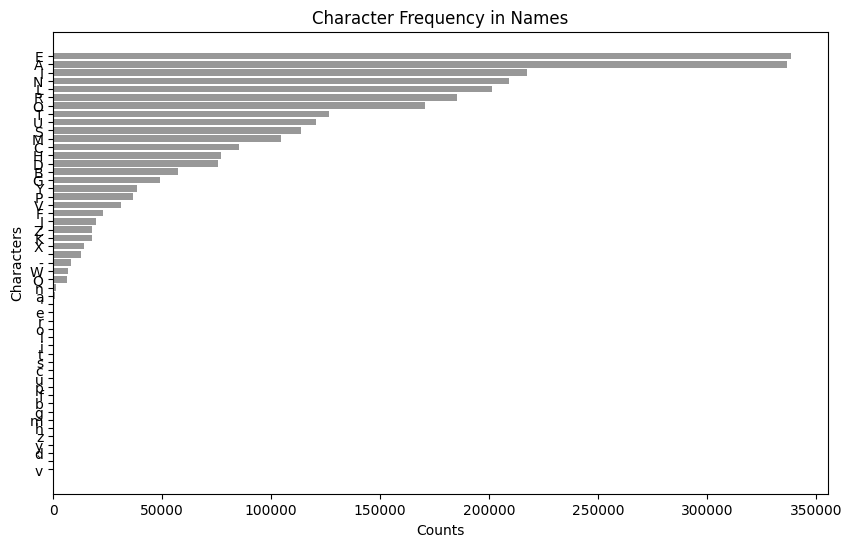

In [10]:
import matplotlib.pyplot as plt

sorted_char_freq = dict(sorted_char_freq) # formatted for plotting
characters = list(sorted_char_freq.keys())
character_counts = list(sorted_char_freq.values())

colours = ['C7'] * len(characters)

for vowel in '':    
  highlighted_bar_index = characters.index(vowel) # The bar's index that we want to change colour.
  colours[highlighted_bar_index] = 'C0'

plt.figure(figsize=(10, 6))
# plt.barh(characters, character_counts, color='C0', alpha=0.8)
plt.barh(characters, character_counts, color=colours, alpha=0.8, )
plt.xlabel('Counts')
plt.ylabel('Characters')
plt.title('Character Frequency in Names')
plt.show()


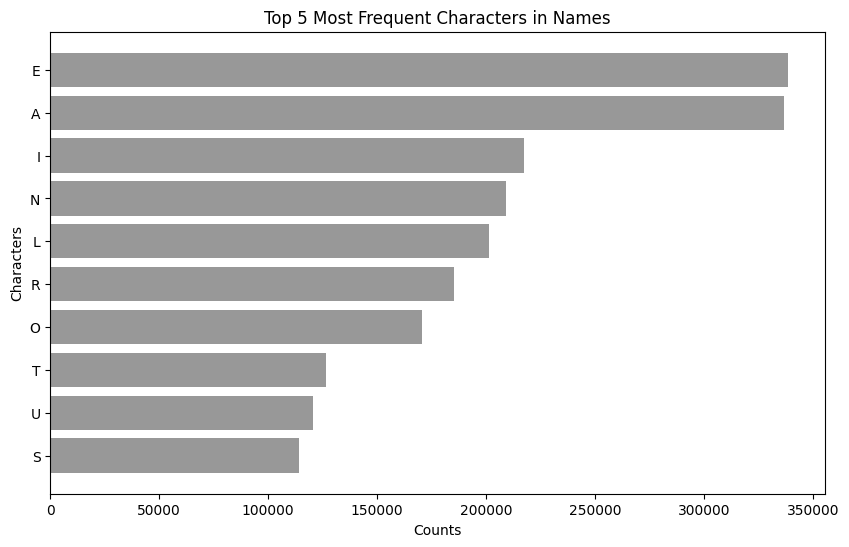

In [11]:
import matplotlib.pyplot as plt

sorted_char_freq = dict(sorted_char_freq) # formatted for plotting
characters = list(sorted_char_freq.keys())
character_counts = list(sorted_char_freq.values())

colours = ['C7'] * len(characters)

for vowel in 'aeiou':    
  highlighted_bar_index = characters.index(vowel) # The bar's index that we want to change colour.
  colours[highlighted_bar_index] = 'C0'

plt.figure(figsize=(10, 6))
# plt.barh(characters, character_counts, color='C0', alpha=0.8)
plt.barh(characters[-10:], character_counts[-10:], color=colours[-10:], alpha=0.8, )
plt.xlabel('Counts')
plt.ylabel('Characters')
plt.title('Top 5 Most Frequent Characters in Names')
plt.show()


# Find if there is a missing characters in the dataset

In [12]:
import string

all_possible_char = set(string.ascii_lowercase) # Note: punctuation could be added... or special accent characters.
uniq_char_in_all_names = set(all_names)
print(all_possible_char)
print(uniq_char_in_all_names)

{'e', 'z', 'd', 'x', 'h', 'y', 'o', 'r', 'k', 'j', 'l', 'v', 'g', 's', 'm', 't', 'u', 'p', 'i', 'b', 'c', 'f', 'n', 'w', 'a', 'q'}
{'e', 'z', 'd', 'W', 'h', 'y', 'o', 'r', 'I', "'", 'D', 'l', 'X', 'v', ' ', 'V', 'g', 'O', 'Q', 'K', 's', 'B', 'F', 'E', 'Y', 'J', 'm', 'N', '-', 't', 'G', 'L', 'T', 'u', 'p', 'Z', 'i', 'P', '`', 'U', 'b', 'c', 'R', 'H', 'f', 'n', 'C', 'A', 'M', 'a', 'S'}


In [13]:
# Do the difference between two sets
char_unrepresented = all_possible_char - uniq_char_in_all_names
print('Here is all the characters not represented in the dataset:', char_unrepresented)

Here is all the characters not represented in the dataset: {'j', 'x', 'w', 'q', 'k'}


# Find what is the character length distribution of dataset

In [14]:
df['lengths'] = df['label'].apply(len)
sdf = df[['label','lengths']]
sdf.head()

,label,lengths
0,BALTHAZAR,9
1,SIMON,5
2,BENES,5
3,LA LOVE,7
4,DAPHNE,6


In [15]:
# longest names
sdf.sort_values(['lengths'],ascending=False)[0:5]

,label,lengths
39214,CAPUCINE CAPUCINE MARIE PHILIPPINE,34
5221,DATE DE NAISSANCE CLASSE,24
37189,DATE OF NAISSANCE CLASSE,24
9502,DARE DE NAISSANCE CLASSE,24
80310,ANGEL MICHELL OU INDICI,23


date of naissance classe is French for date of birth class

In [16]:
from IPython.display import Image as show_im
df.sort_values(['lengths'],ascending=False)[0:5]

,FILENAME,label,lengths
39214,TRAIN_39215.jpg,CAPUCINE CAPUCINE MARIE PHILIPPINE,34
5221,TEST_5222.jpg,DATE DE NAISSANCE CLASSE,24
37189,TEST_37190.jpg,DATE OF NAISSANCE CLASSE,24
9502,TRAIN_09503.jpg,DARE DE NAISSANCE CLASSE,24
80310,TRAIN_80311.jpg,ANGEL MICHELL OU INDICI,23


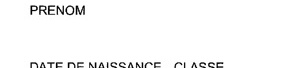

In [17]:
show_im(get_dataset_folder_path() / "raw" / "test" / "TEST_5222.jpg")

In [18]:
# shortist names
sdf.sort_values(['lengths'],ascending=False)[-6:-1]

,label,lengths
253792,T,1
115700,G,1
119377,O,1
105071,A,1
1638,X,1


In [19]:
df.sort_values(['lengths'],ascending=False)[-6:-1]

,FILENAME,label,lengths
253792,TRAIN_253793.jpg,T,1
115700,TRAIN_115701.jpg,G,1
119377,TRAIN_119378.jpg,O,1
105071,TRAIN_105072.jpg,A,1
1638,TEST_1639.jpg,X,1


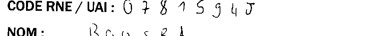

In [20]:
from IPython.display import Image as show_im
show_im(get_dataset_folder_path() / "raw" / "test" / "TEST_8807.jpg")

In [21]:
sdf['lengths'].describe()

count    413701.000000
mean          6.542401
std           2.128886
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          34.000000
Name: lengths, dtype: float64

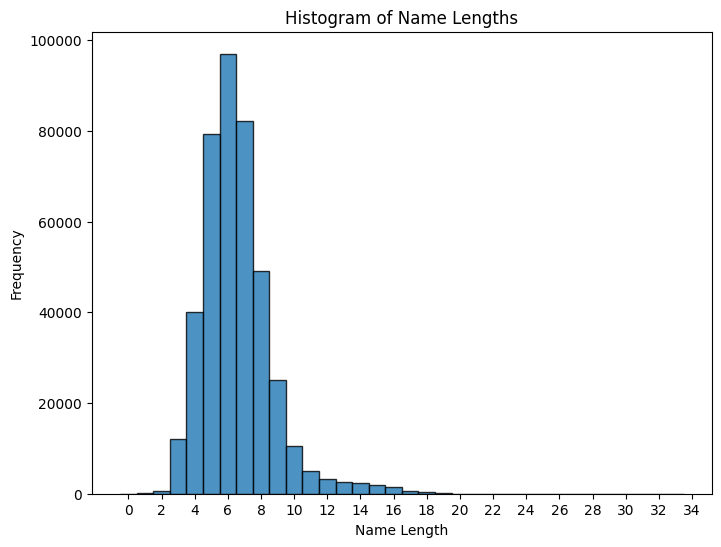

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(sdf['lengths'], bins=range(0, max(sdf['lengths']) + 1), color='C0', edgecolor='black', alpha=0.8)
plt.xlabel('Name Length')
plt.xticks([x + 0.5 for x in range(max(sdf['lengths']) + 1) if x % 2 == 0], [x for x in range(max(sdf['lengths']) + 1) if x % 2 == 0])
plt.ylabel('Frequency')
plt.title('Histogram of Name Lengths')
# plt.grid(True)
plt.show()

# Find the most frequent names in the list

In [23]:
name_freq = sdf['label'].value_counts()
print(name_freq[0:5])
print(name_freq[-6:-1])

label
THOMAS    2271
EMPTY     2204
LEA       1986
EMMA      1870
LUCAS     1850
Name: count, dtype: int64
label
CAIVEAU     1
DEBOCQ      1
TREAN       1
BORNACIR    1
DOUKSAS     1
Name: count, dtype: int64


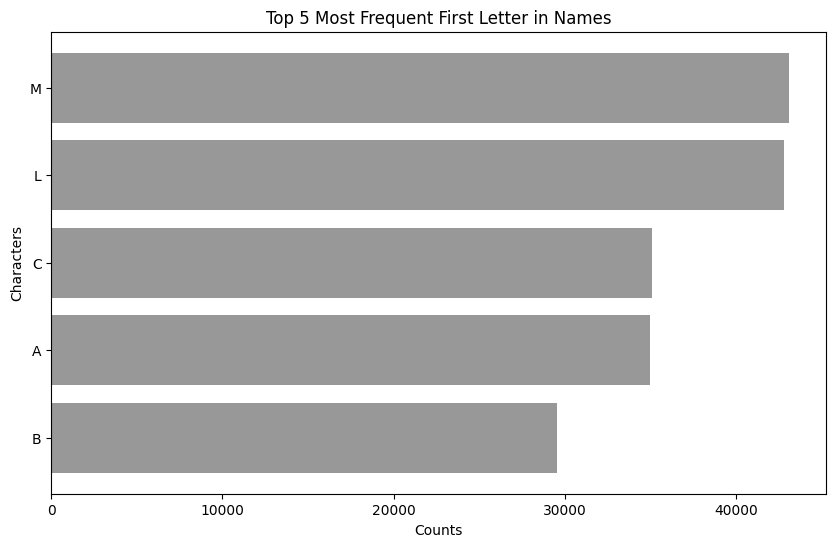

In [24]:
all_names = ''.join(df['label'].map(lambda x: x[0])) # put all names into single string
char_freq = Counter(all_names)
sorted_char_freq = sorted(char_freq.items(), key=lambda item_tuple: item_tuple[1], reverse=False) # parse tuples and sort via the key, which is the count.

import matplotlib.pyplot as plt

sorted_char_freq = dict(sorted_char_freq) # formatted for plotting
characters = list(sorted_char_freq.keys())
character_counts = list(sorted_char_freq.values())

colours = ['C7'] * len(characters)

for vowel in 'm':    
  highlighted_bar_index = characters.index(vowel) # The bar's index that we want to change colour.
  colours[highlighted_bar_index] = 'C0'

plt.figure(figsize=(10, 6))
# plt.barh(characters, character_counts, color='C0', alpha=0.8)
plt.barh(characters[-5:], character_counts[-5:], color=colours[-5:], alpha=0.8, )
plt.xlabel('Counts')
plt.ylabel('Characters')
plt.title('Top 5 Most Frequent First Letter in Names')
plt.show()